# Career Booster Python & Data Science
### Session 3

Ce notebook détaille l'implémentation de l'algorithme des k-means (ou k-moyennes)

Description : l'algorithme des k-means méthode de "clustering" basée sur une optimisation d'un calcul de distance.

Le clustering est une façon de classer des données en groupes (en clusters) lorsqu'on ne sait rien de l'organisation de ces données. Il s'agit donc d'une méthode non-supervisée.

In [2]:
# --- Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy as cp

In [3]:
path_to_file = "../data/data_clustering.csv"

In [4]:
# --- Import des données
data = pd.read_csv(path_to_file)
values = data.values

In [5]:
values

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [6]:
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [7]:
data.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


In [8]:
data.sample(5)

,V1,V2
1017,37.81383,42.245330
1877,44.66972,69.177050
2417,62.15595,-5.598550
2697,58.89835,-22.795580
325,12.56065,-4.733039


Représentation des données, afin d'avoir une idée de leur distribution.

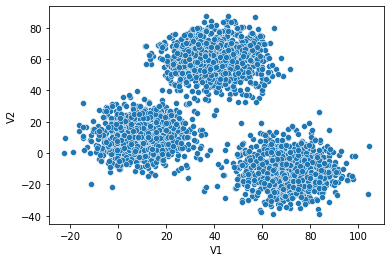

In [9]:
sns.scatterplot(x="V1", y="V2", data=data);

Ici, il est plutôt clair qu'il y a **trois** clusters distincts (ce n'est pas toujours aussi simple ;) )

### Algorithme

In [15]:
# --- Détermination du nombre de clusters que l'on souhaite, basé sur la représentation des données ci-dessus
nb_clusters = 3

# --- Génération aléatoire de trois points ("centroides") de coordonnées (x, y)
x_min = np.min(values) + 20
y_min = np.max(values) - 20

centroids = np.random.randint(x_min, y_min, size=(nb_clusters, 2))

centroids = centroids.astype(float)
first_centroids = cp.copy(centroids)

for iCpt, iCentroid in enumerate(centroids):
    print(f"Le centroide #{iCpt} a pour coordonnées : {iCentroid}")

Le centroide #0 a pour coordonnées : [  4. -12.]
Le centroide #1 a pour coordonnées : [71.  3.]
Le centroide #2 a pour coordonnées : [-9. -7.]


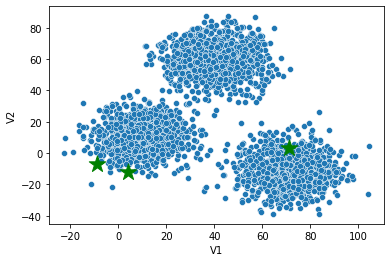

In [16]:
ax = sns.scatterplot(x="V1", y="V2", data=data)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='g');

In [17]:
# To store the value of centroids when it updates
centroids_prev = np.zeros(centroids.shape)

# --- Cluster Labels(0, 1, 2)
clusters = np.zeros(len(values))

# --- Fonction d'erreur : Distance entre les nouveaux centroïdes et les précédents
error = np.linalg.norm(centroids - centroids_prev)

all_centroids = []

# --- Tant que l'erreur n'est pas égale à 0
while error != 0:

    # --- Assignation de chaque valeur du dataset à un des 3 clusters
    for iCpt, iVal in enumerate(values):
        distances = np.linalg.norm(iVal - centroids, axis=1)
        cluster = np.argmin(distances)
        clusters[iCpt] = cluster
    
    # --- On garde les valeurs des centroides précédents
    centroids_prev = cp.copy(centroids)
    
    # --- On garde en mémoire toutes les positions des centroides au cours de l'apprentissage
    # --- Ce n'est pas utile à l'apprentissage lui-même
    # --- Nous l'utiliserons juste pour illustrer l'évolution de l'apprentissage
    all_centroids.append(centroids_prev)
    
    # --- Détermination des nouvelles positions en prenant la position moyenne des points
    for iCluster in range(nb_clusters):
        points = [values[iCpt]
            for iCpt in range(len(values))
            if clusters[iCpt] == iCluster
            ]
        centroids[iCluster] = np.mean(points, axis=0)

    # --- On calcule l'erreur (la distance ici) entre les anciens et les nouveaux points
    error = np.linalg.norm(centroids - centroids_prev)

In [18]:
for iCpt, iCentroid in enumerate(centroids):
    print(f"Coordonnées du centroide #{iCpt} : {round(iCentroid[0], 2), round(iCentroid[1], 2)}")

Coordonnées du centroide #0 : (9.48, 10.69)
Coordonnées du centroide #1 : (69.92, -10.12)
Coordonnées du centroide #2 : (40.68, 59.72)


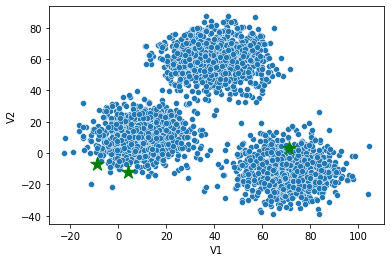

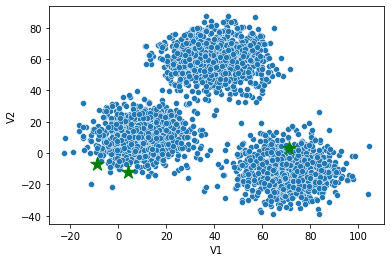

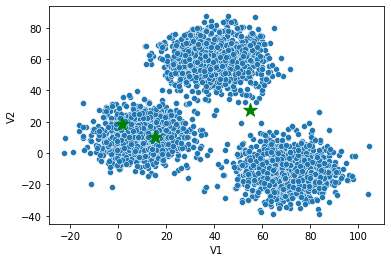

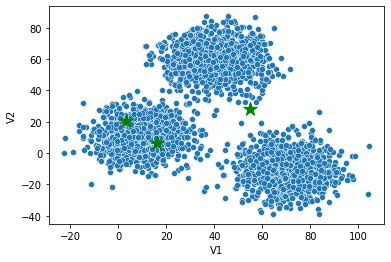

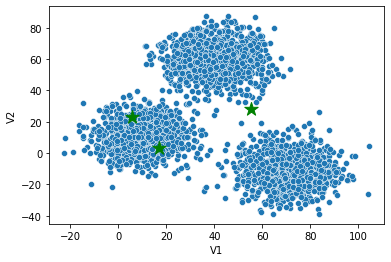

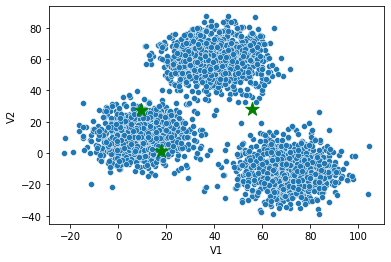

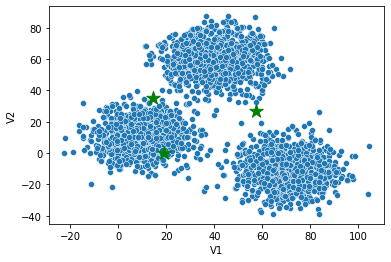

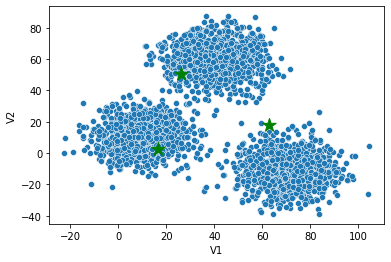

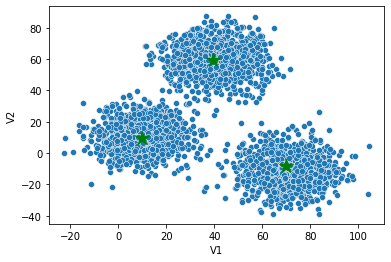

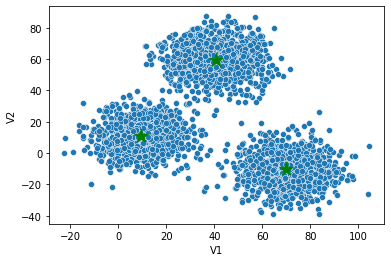

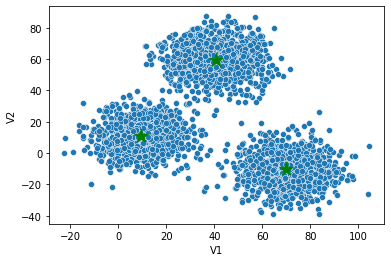

In [19]:
plt.figure()
ax = sns.scatterplot(x="V1", y="V2", data=data)
ax.scatter(first_centroids[:, 0], first_centroids[:, 1], marker='*', s=200, c='g')
for ii in all_centroids:
    plt.figure()
    ax = sns.scatterplot(x="V1", y="V2", data=data)
    ax.scatter(ii[:, 0], ii[:, 1], marker='*', s=200, c='g')

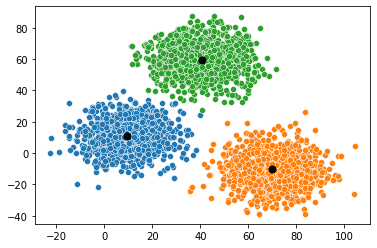

In [20]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

for iCluster in range(nb_clusters):
    points = np.array([values[iValue]
                       for iValue in range(len(values))
                       if clusters[iValue] == iCluster])
    ax = sns.scatterplot(x=points[:, 0], y=points[:, 1])

ax.scatter(centroids[:, 0], centroids[:, 1], marker='.', s=200, c='#050505')

***

### Version avec sklearn

La bibliothèque scikit learn est spécialement conçue pour faire du Machine Learning.
Elle contient donc logiquement un package dédié à l'algorithme des K-means.

In [21]:
# --- Import des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

# --- Esthétique du graphique
colors = sns.cubehelix_palette(6);  # choix de la palette de couleur
sns.set_style('white');  # choix de la couleur du background
sns.despine(offset=10, trim=True);  # choix du retrait des "spines"

# --- Lecture des données
data = pd.read_csv(path_to_file)

# --- Conversion en array numpy
X = data.values

<Figure size 432x288 with 0 Axes>

La bibliothèque KMeans de scikit learn permet de faire tourner l'algorithme des kmeans très simplement :

In [22]:
# --- Création de l'objet sklearn "KMeans"
kmeans_model = KMeans(n_clusters=3)

# --- Entraînement du modèle
kmeans_model.fit(X)

KMeans(n_clusters=3)

Le modèle est maintenant appris. Il est alors possible d'assigner nos données d'entrée à un des trois clusters. Il sera également possible de faire cette assignation (cette "prédiction" sur des données inconnues, c'est tout l'intérêt !)

In [23]:
# --- Assignation de chaque paire de valeurs à un des trois clusters
labels = kmeans_model.predict(X)

***
Réprésentation du résultat de l'apprentissage du modèle :

Les centroides ont pour coordonnées :
Centroide 0 : (40.68, 59.72)
Centroide 1 : (69.92, -10.12)
Centroide 2 : (9.48, 10.69)


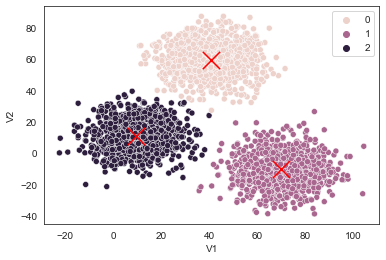

In [24]:
# --- Récupération des coordonnées des clusters
centroids = kmeans_model.cluster_centers_

print("Les centroides ont pour coordonnées :")
for iCpt, iCentroid in enumerate(centroids):
    print(f"Centroide {iCpt} : {round(iCentroid[0], 2), round(iCentroid[1], 2)}")

# --- Représentation des données en scatter plot
ax = sns.scatterplot(x="V1", y="V2", hue=labels, data=data);

# --- Ajout des 3 centroïdes
ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=300);

***
### Prédiction de nouveaux points
Nous avons maintenant des nouveaux points que nous souhaiterions catégoriser :

In [34]:
# --- Coordonnées du point à prédire
point_to_predict = [60, 25]

# --- Détermination du cluster auquel le nouveau point appartient :
cluster = kmeans_model.predict(np.array([point_to_predict]))[0]

print(f"Le point {point_to_predict} a été assigné au cluster #{cluster}")

Le point [60, 25] a été assigné au cluster #1


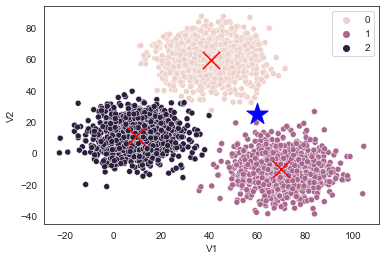

In [35]:
# --- Représentation des données et des centroïdes
ax = sns.scatterplot(x="V1", y="V2", hue=labels, data=data);
ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=300);

# --- Représentation du nouveau point 
ax.scatter(point_to_predict[0], point_to_predict[1], marker='*', c="blue", s=500);


On peut vérifier ce résultat simplement : il suffit d'analyser les distances euclidiennes entre le point à prédire et tous les clusters :

In [36]:
distances = [np.linalg.norm(point_to_predict - ii) for ii in kmeans_model.cluster_centers_]

for iCpt, iDist in enumerate(distances):
    print(f"Distance au cluster #{iCpt} : {iDist}")
    
print("\n")
print(f"Le centroide le plus proche du nouveau point est le #{np.argmin(distances)}")

Distance au cluster #0 : 39.72801835231765
Distance au cluster #1 : 36.49491245516756
Distance au cluster #2 : 52.510541354236


Le centroide le plus proche du nouveau point est le #1


Le nouveau point a donc bien été assigné au cluster dont le centroïde est le plus proche.

***
### Comment trouver le nombre de clusters ?

Il est possible d'utiliser la méthode dite du coude ("elbow method") qui permet d'avoir une indication sur le nombre potentiellement optimal de clusters.

Deux valeurs sont particulièrement d'importance ici : la **distorsion** et l'**inertie** :
- la distorsion est la moyenne des distances euclidiennes au carré entre les centroïdes et les points qui leur sont assignés
- l'inertie est la somme des distances au carré entre les points et leur centroïde.

In [38]:
from scipy.spatial.distance import cdist 

distortions = []
inertias = [] 
mapping1 = {} 
mapping2 = {} 

K = range(1,10)
  
for k in K:
    print(f"Apprentissage du modèle avec {k} clusters")
    
    # --- Initialisation du modèle
    kmeans_model = KMeans(n_clusters=k)

    # --- Apprentissage du modèle
    kmeans_model.fit(X)     

    # --- On garde les valeurs des distorsions
    distortions.append(
        sum(np.min(cdist(X, kmeans_model.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0])
    
    # --- On garde les valeurs des inerties
    inertias.append(kmeans_model.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeans_model.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeans_model.inertia_ 


Apprentissage du modèle avec 1 clusters
Apprentissage du modèle avec 2 clusters
Apprentissage du modèle avec 3 clusters
Apprentissage du modèle avec 4 clusters
Apprentissage du modèle avec 5 clusters
Apprentissage du modèle avec 6 clusters
Apprentissage du modèle avec 7 clusters
Apprentissage du modèle avec 8 clusters
Apprentissage du modèle avec 9 clusters


***
Représentations des résultats en fonction de l'utilisation du critère de distorsion et d'inertie, respectivement.

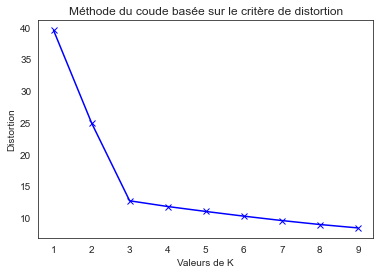

In [39]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Valeurs de K') 
plt.ylabel('Distortion') 
plt.title('Méthode du coude basée sur le critère de distortion')
plt.show()

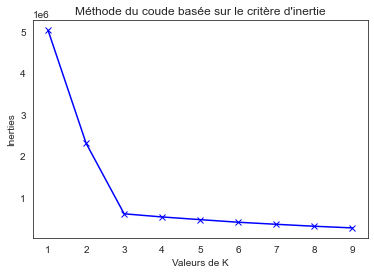

In [40]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Valeurs de K') 
plt.ylabel('Inerties') 
plt.title("Méthode du coude basée sur le critère d'inertie")
plt.show()

Les deux critères montrent une inflexion caractéristique à K=3 clusters.

Il est tout à fait possible d'aller au-delà de cette valeur, mais cela risque d'aboutir à un clustering non pertinent. Ci-dessous est illustré un apprentissage avec K=9 clusters.

Les centroides ont pour coordonnées :
Centroide 1 : (9.66, 21.28)
Centroide 2 : (67.18, -0.26)
Centroide 3 : (44.92, 50.01)
Centroide 4 : (0.02, 5.43)
Centroide 5 : (30.14, 61.58)
Centroide 6 : (61.82, -18.04)
Centroide 7 : (47.48, 67.15)
Centroide 8 : (18.76, 5.86)
Centroide 9 : (80.58, -13.49)


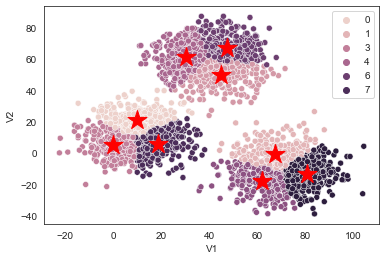

In [41]:
colors = sns.cubehelix_palette(12);  # choix de la palette de couleur

# --- Assignation de chaque paire de valeurs à un des trois clusters
labels = kmeans_model.predict(X)

# --- Récupération des coordonnées des clusters
centroids = kmeans_model.cluster_centers_

print("Les centroides ont pour coordonnées :")
for iCpt, iCentroid in enumerate(centroids):
    print(f"Centroide {iCpt+1} : {round(iCentroid[0], 2), round(iCentroid[1], 2)}")

# --- Représentation des données en scatter plot
ax = sns.scatterplot(x="V1", y="V2", hue=labels, data=data);

# --- Ajout des 3 centroïdes
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='red', s=400);